### Problem Statement
* Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

* Fake news spreads faster than real news and creates problems and fear among groups and in society.

* We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

* We will use glove embeddings from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.

#### Dataset
Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

In [1]:
import pandas as pd
fake_df = pd.read_csv("Fake.csv")
print(fake_df.shape)
fake_df.head(5)

(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [2]:
fake_df['label']='Fake'
fake_df.head(5)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [3]:
true_df = pd.read_csv("True.csv")
print(true_df.shape)
true_df.head(5)

(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
true_df['label']='True'
true_df.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [5]:
frames = [true_df, fake_df]
df = pd.concat(frames)
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [10]:
df = df.sample(frac=1)
df

,title,text,subject,date,label
6583,Idiot Donald Trump Supporter Confronts Ted Cr...,It s a pretty well-known fact among those who ...,News,"May 2, 2016",Fake
4397,"France, Germany to pursue Syria peace efforts ...",PARIS (Reuters) - France and Germany will cont...,politicsNews,"April 7, 2017",True
3791,"Working the farm, while Trump talks tough on i...","KING CITY, Calif. (Reuters) - On an overcast s...",politicsNews,"May 15, 2017",True
11992,Explainer: Myanmar wields colonial-era law aga...,(Reuters) - Myanmar has accused Reuters report...,worldnews,"December 17, 2017",True
11634,"Myanmar says still working with U.N., wants a ...",YANGON (Reuters) - Myanmar wants to continue w...,worldnews,"December 21, 2017",True
...,...,...,...,...,...
18944,TREY GOWDY Reminds Comey It’s 10 years in jail...,,left-news,"Mar 20, 2017",Fake
19789,French unions and left-wing plan 10 days of ac...,PARIS (Reuters) - President Emmanuel Macron ma...,worldnews,"September 18, 2017",True
13904,"Britain has 10-day ""absolute deadline"" to deli...",BRUSSELS (Reuters) - Britain has only 10 days ...,worldnews,"November 24, 2017",True
14277,WATCH: HARVARD STUDENTS Caught On Tape Saying ...,Is there a worse crime than being a white male...,politics,"Mar 16, 2016",Fake


In [11]:
df['label_num'] = df['label'].map({'Fake' : 0, 'True': 1})
df.head(5)

,title,text,subject,date,label,label_num
6583,Idiot Donald Trump Supporter Confronts Ted Cr...,It s a pretty well-known fact among those who ...,News,"May 2, 2016",Fake,0
4397,"France, Germany to pursue Syria peace efforts ...",PARIS (Reuters) - France and Germany will cont...,politicsNews,"April 7, 2017",True,1
3791,"Working the farm, while Trump talks tough on i...","KING CITY, Calif. (Reuters) - On an overcast s...",politicsNews,"May 15, 2017",True,1
11992,Explainer: Myanmar wields colonial-era law aga...,(Reuters) - Myanmar has accused Reuters report...,worldnews,"December 17, 2017",True,1
11634,"Myanmar says still working with U.N., wants a ...",YANGON (Reuters) - Myanmar wants to continue w...,worldnews,"December 21, 2017",True,1


In [12]:
df.drop(['title', 'subject', 'date'], axis='columns',inplace=True)
df.head(5)

,text,label,label_num
6583,It s a pretty well-known fact among those who ...,Fake,0
4397,PARIS (Reuters) - France and Germany will cont...,True,1
3791,"KING CITY, Calif. (Reuters) - On an overcast s...",True,1
11992,(Reuters) - Myanmar has accused Reuters report...,True,1
11634,YANGON (Reuters) - Myanmar wants to continue w...,True,1


In [13]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [14]:
new_df = df[:1000]

In [15]:
len(new_df[new_df['label']=='True'])

489

In [16]:
len(new_df[new_df['label']=='Fake'])

511

In [17]:
x = new_df.text.iloc[2]
x

'KING CITY, Calif. (Reuters) - On an overcast spring morning, about 40 Mexican men turned out in the pre-dawn hours to board a bus for California’s Salinas Valley where they would harvest 16 acres (6.47 hectares) of lettuce over the next three days.  Hector Manuel Morales, 20, came north from Mexico to work the fields with his three cousins. He said his family worried about his journey, spooked by President Donald Trump’s talk of a crackdown on illegal immigrants. But he does not anticipate problems.  While about half of U.S. crop workers are in the country illegally, Morales and the other men have H-2A visas, which allow them to work temporarily as seasonal agricultural laborers on American farms.  “We are not violating any law here in the U.S.,” he said. “We come to work.”  His co-worker Rafael Gonzalez Arredondo, 23, said listening to Trump’s statements about Mexico was “difficult, but we are going to show him that Mexicans are hard working people, that we are not what he says.” The

In [18]:
len(nlp(x).vector)

300

In [19]:
new_df['vector'] = new_df['text'].apply(lambda text: nlp(text).vector)
new_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_21088\262290618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['vector'] = new_df['text'].apply(lambda text: nlp(text).vector)


,text,label,label_num,vector
6583,It s a pretty well-known fact among those who ...,Fake,0,"[-1.4674767, 0.81735283, -2.1004786, 0.0611382..."
4397,PARIS (Reuters) - France and Germany will cont...,True,1,"[-2.1274014, 0.45076767, -1.1898363, 1.2364595..."
3791,"KING CITY, Calif. (Reuters) - On an overcast s...",True,1,"[-1.7257797, 0.69974107, -2.1603777, 0.6128667..."
11992,(Reuters) - Myanmar has accused Reuters report...,True,1,"[-2.7659295, -0.25627393, -1.193212, 0.8319124..."
11634,YANGON (Reuters) - Myanmar wants to continue w...,True,1,"[-2.359835, 0.492431, -1.8893112, 0.6354369, 4..."


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    new_df.vector.values,
    new_df.label_num,
    test_size=0.2,
    random_state=2022
)

In [21]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [25]:
from sklearn.metrics import classification_report

In [26]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       113
           1       0.71      0.90      0.79        87

    accuracy                           0.80       200
   macro avg       0.80      0.81      0.79       200
weighted avg       0.82      0.80      0.80       200



Text(95.72222222222221, 0.5, 'Truth')

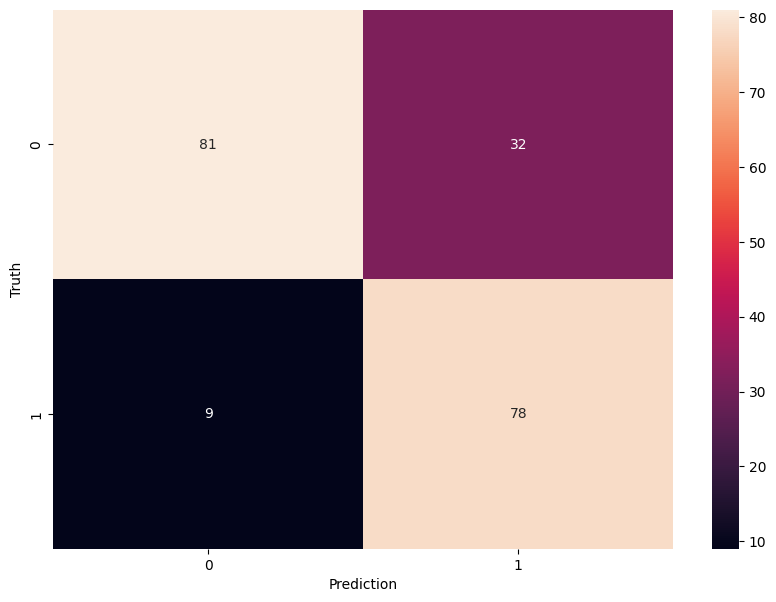

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')